In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
from sklearn.datasets import load_digits

# Training functions
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

### Loading and exploring data

In [2]:
df = load_digits()
X = df.data
y = df.target
images = df.images

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


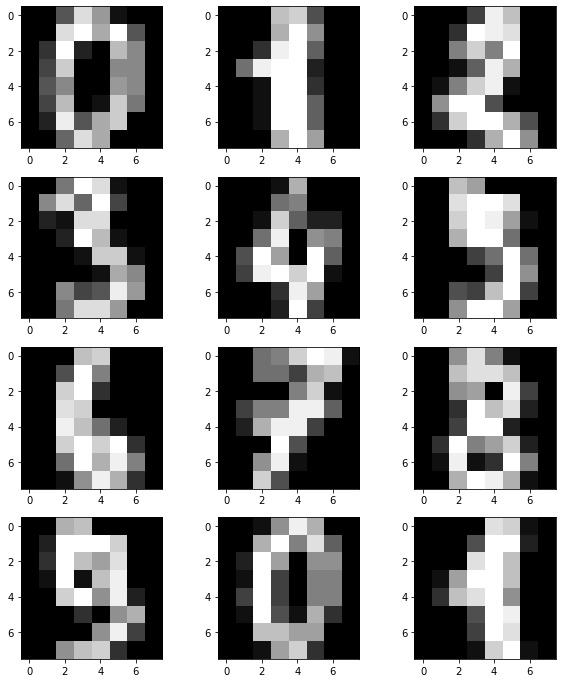

In [3]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (10,12))

for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap = 'gray')

In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Splitting data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


### Training and scoring models

In [6]:
lr = LogisticRegression(max_iter = 3000, random_state = 42)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(lr.score(X_test,y_test))
print(classification_report(y_test,preds))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.93      0.96      0.95        56
           2       1.00      0.96      0.98        53
           3       0.92      0.96      0.94        51
           4       0.97      1.00      0.99        35
           5       0.88      0.95      0.92        40
           6       0.97      0.97      0.97        36
           7       1.00      0.94      0.97        36
           8       0.95      0.86      0.90        49
           9       0.94      0.98      0.96        46

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



C:\Users\roank\BTS\anaconda3\envs\DSF\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Applying KMeans for feature reduction

In [7]:
k = 50
kmeans = KMeans(n_clusters = 50)

kmeans.fit(X_train)
X_train_50 = kmeans.transform(X_train)
X_test_50 = kmeans.transform(X_test)

lr = LogisticRegression(max_iter = 3000, random_state = 42)
lr.fit(X_train_50,y_train)

preds = lr.predict(X_test_50)

print(lr.score(X_test_50,y_test))
print(classification_report(y_test,preds))

0.9755555555555555
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.98      0.99        56
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        51
           4       0.97      1.00      0.99        35
           5       0.90      0.95      0.93        40
           6       1.00      0.97      0.99        36
           7       0.97      0.92      0.94        36
           8       0.96      0.98      0.97        49
           9       0.94      0.98      0.96        46

    accuracy                           0.98       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



C:\Users\roank\BTS\anaconda3\envs\DSF\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Applying PCA for feature reduction

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(X_train)

X_train_tr = pca.transform(X_train)
X_test_tr = pca.transform(X_test)

print(pca.n_components_)
print(pca.explained_variance_ratio_.sum())

28
0.9502054430432768


In [9]:
lr = LogisticRegression(max_iter = 3000, random_state = 42)
lr.fit(X_train_tr,y_train)

preds = lr.predict(X_test_tr)

print(lr.score(X_test_tr,y_test))
print(classification_report(y_test,preds))

0.9644444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      0.95      0.95        56
           2       1.00      0.96      0.98        53
           3       0.96      0.96      0.96        51
           4       1.00      0.97      0.99        35
           5       0.89      0.97      0.93        40
           6       1.00      0.97      0.99        36
           7       1.00      0.94      0.97        36
           8       0.94      0.94      0.94        49
           9       0.92      0.98      0.95        46

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.97       450
weighted avg       0.97      0.96      0.96       450

